#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0, 20, 50)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -X + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

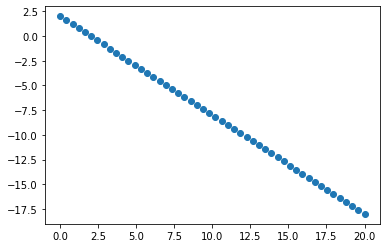

In [4]:
plt.scatter(X, y)

In [19]:
def adagrad_GD(x, y, alpha, max_iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    epslon = 1e-8
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        gradient0 = (1/ m) * np.sum(error)
        vt0 = vt0 + gradient0**2
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epslon))*gradient0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = vt1 + gradient1**2
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epslon))*gradient1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.001):
            print(f'it only took {i} iterations')
            break
            
    return all_costs, theta, all_thetas


In [99]:
alpha = 0.01
max_iterations = 10000
all_costs, theta, all_thetas = adagrad_GD(X, y, alpha, max_iterations)

it only took 2563 iterations


In [100]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.899681802359606

Text(0.5, 1.0, 'iterations vs cost')

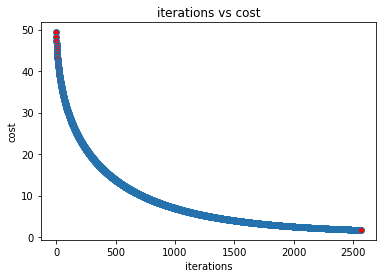

In [101]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('iterations vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

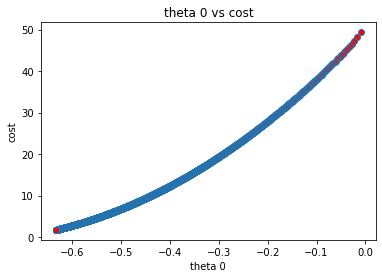

In [102]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

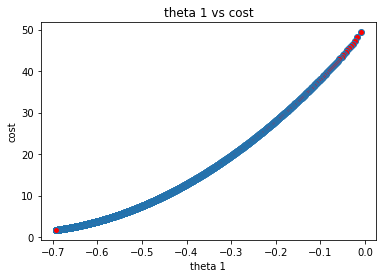

In [103]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

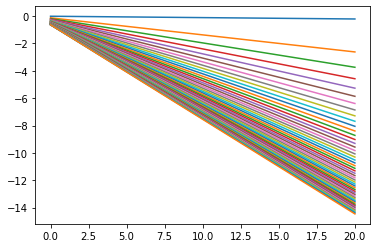

In [107]:
fig, ax = plt.subplots()
for i in range(0, len(all_thetas), 50):
    y_pred = all_thetas[i][0] + all_thetas[i][1] * X
    ax.plot(X, y_pred)
plt.show()

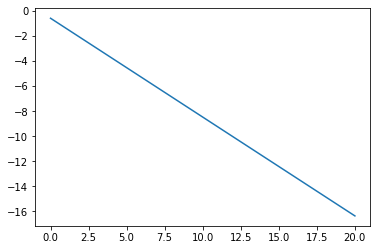

In [26]:
y_pred = theta[0] + theta[1] * X
plt.plot(X, y_pred)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [37]:
def RMSProp_GD(x, y, alpha, beta, max_iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    epslon = 1e-8
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        gradient0 = (1/ m) * np.sum(error)
        vt0 = beta*vt0 + (1-beta)*gradient0**2
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epslon))*gradient0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = beta*vt1 + (1-beta)*gradient1**2
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epslon))*gradient1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.001):
            print(f'it only took {i} iterations')
            break
            
    return all_costs, theta, all_thetas

In [96]:
alpha = 0.01
beta = 0.9
max_iterations = 10000
all_costs, theta, all_thetas = RMSProp_GD(X, y, alpha, beta, max_iterations)

it only took 177 iterations


In [97]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.9748676858317622

Text(0.5, 1.0, 'iterations vs cost')

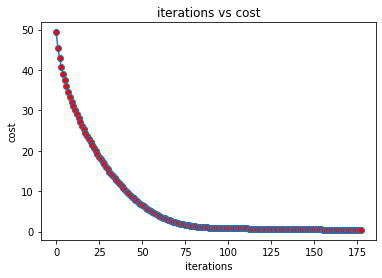

In [98]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('iterations vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

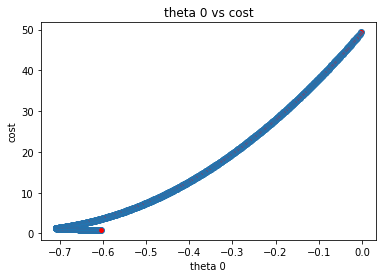

In [77]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

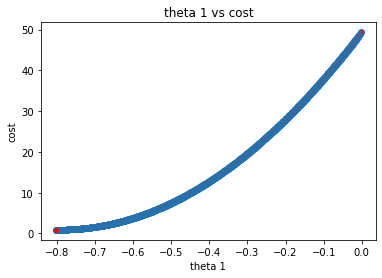

In [78]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

In [110]:
def Adam_GD(x, y, alpha, beta, gamma, iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    epslon = 1e-8
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    # let mt0 and mt1 start with 0
    mt0, mt1 = 0, 0
    for i in range(iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        # note: here the update won't be with the gradient only,
        # it will be the gradient + the history from the previous iterations(vt).
        gradient0 = (1/ m) * np.sum(error)
        vt0 = beta*vt0 + (1-beta)*gradient0**2
        mt0 = gamma*mt0 + (1-gamma)*gradient0
        # bais correction terms
        #vt0 = vt0/(1-beta**(i+1))
        #mt0 = mt0/(1-gamma**(i+1))
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epslon))*mt0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = beta*vt1 + (1-beta)*gradient1**2
        mt1 = gamma*mt1 + (1-gamma)*gradient1
        # bais correction terms
        #vt1 = vt1/(1-beta**(i+1))
        #mt1 = mt1/(1-gamma**(i+1))
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epslon))*mt1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.001):
            print(f'it only took {i} iterations')
            break
            
    return all_costs, theta, all_thetas

In [111]:
alpha = 0.01
gamma = 0.9
beta = 0.9
iterations = 10000
all_costs, theta, all_thetas = Adam_GD(X, y, alpha, beta, gamma, iterations)

it only took 89 iterations


In [115]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.9433299789429441

Text(0.5, 1.0, 'iterations vs cost')

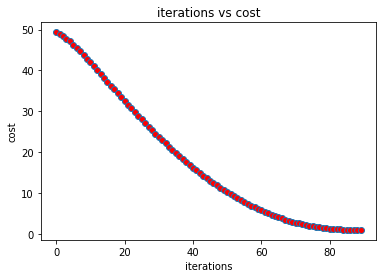

In [112]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('iterations vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

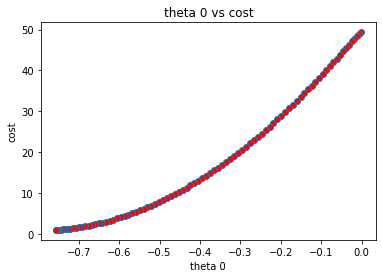

In [113]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

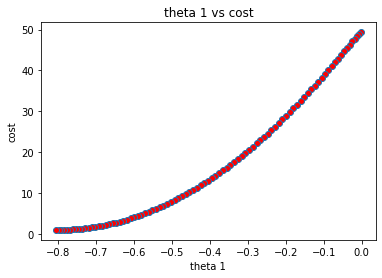

In [114]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')